In [5]:
df = pd.read_csv("heart.csv")  # Make sure the path is correct

# Features & target
X = df.drop("target", axis=1)
y = df["target"]


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Features & target
X = df.drop("target", axis=1)
y = df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier()
}

# Compare using cross-validation
results = {}
for name, model in models.items():
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("model", model)
    ])
    cv_scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
    results[name] = cv_scores.mean()

# Display results
results_df = pd.DataFrame(list(results.items()), columns=["Model", "CV Accuracy"])
print(results_df.sort_values(by="CV Accuracy", ascending=False))

# Select best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

# Train best model
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", best_model)
])
pipeline.fit(X_train, y_train)

# Predictions & evaluation
y_pred = pipeline.predict(X_test)
print(f"\nBest Model: {best_model_name}")
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

                 Model  CV Accuracy
1        Decision Tree     0.986585
2        Random Forest     0.981707
3    Gradient Boosting     0.963415
4                  SVM     0.912195
5                  KNN     0.850000
0  Logistic Regression     0.843902

Best Model: Decision Tree
Accuracy on Test Set: 0.9853658536585366

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Split data (assuming df and 'target' column are ready)
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))






Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



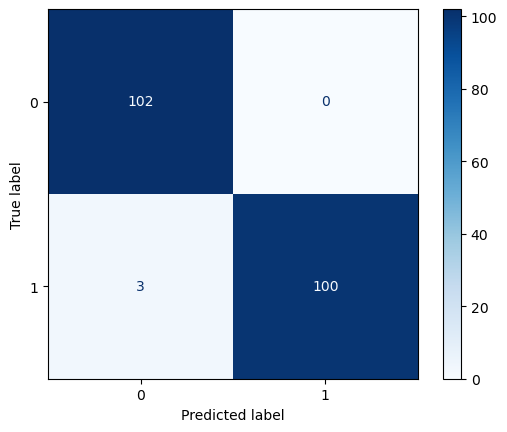

In [10]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [11]:
## Hyperparameter Tuning
param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("\nBest Hyperparameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

# Evaluate best model
best_dt = grid_search.best_estimator_
y_pred_best = best_dt.predict(X_test)
print("\nTuned Model Test Accuracy:", best_dt.score(X_test, y_test))
print(classification_report(y_test, y_pred_best))


Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Score: 0.975609756097561

Tuned Model Test Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



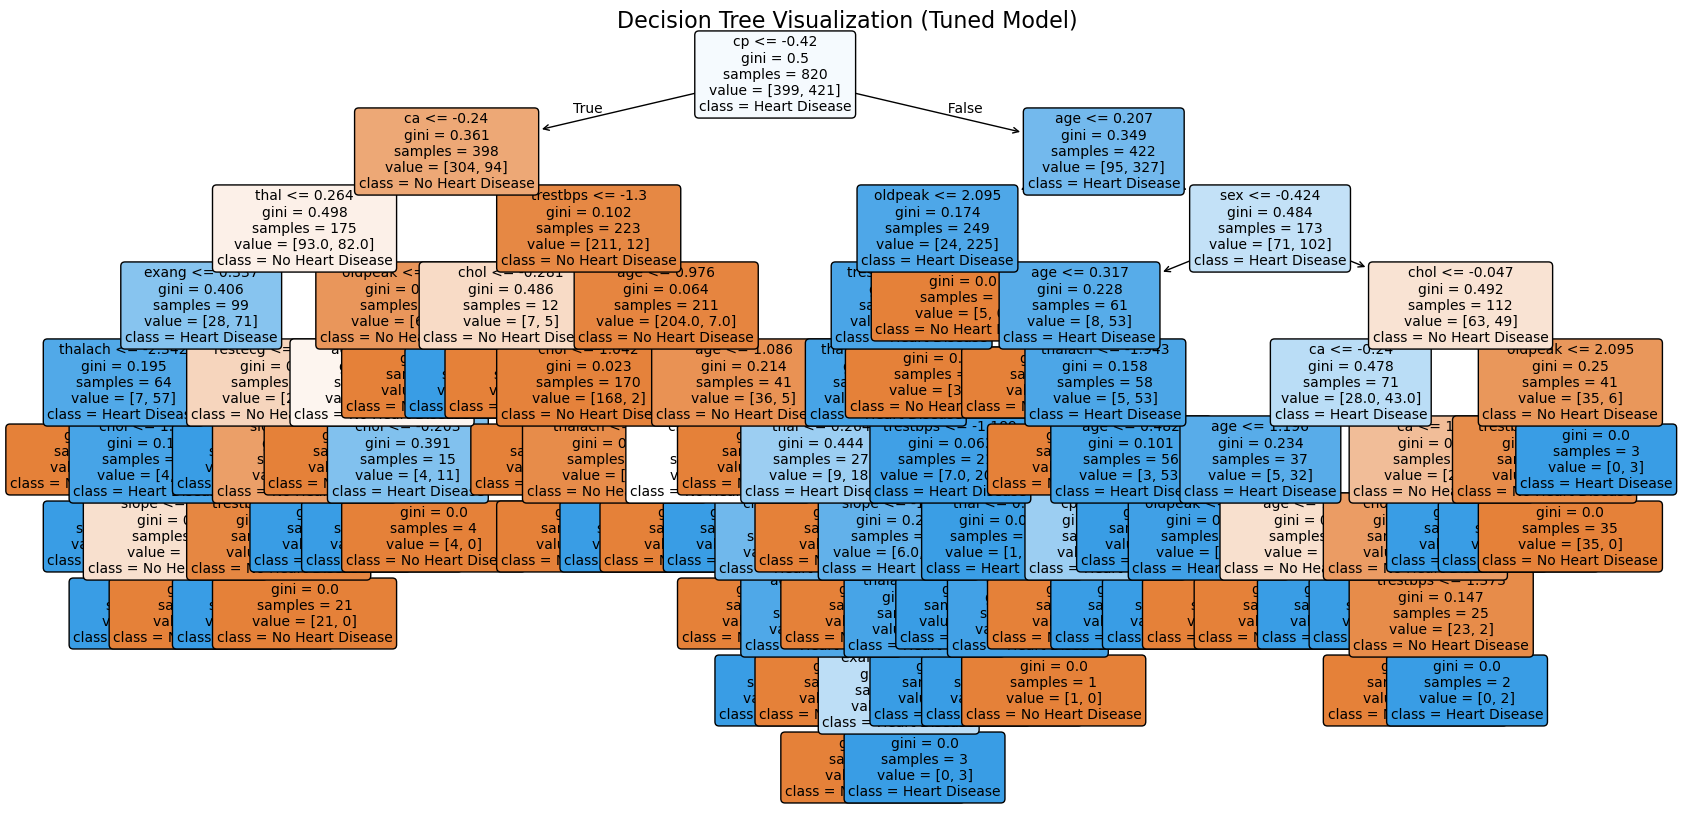

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the tuned Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    best_model,  # This should be your tuned DecisionTreeClassifier
    feature_names=X.columns,
    class_names=['No Heart Disease', 'Heart Disease'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization (Tuned Model)", fontsize=16)
plt.show()